> ### EEE3314: Introduction to Artificial Intelligence

# Assignment \# IV:  Decision Tree

### *Assignement Instructions:*
- **Due date**: 11 PM, Oct. 29, 2021
- **File name**: ID_Name_HW4.ipynb
- Write a program implementing a particular algorithm to solve a given problem.   
- **Analyze the algorithm, theoretically and empirically. Report and discuss your results.**

### *Collaboration policy:*
- You may discuss the questions with your friends, but each student writes their own codes and answers.  
- **Cheating is strictly prohibited, and will be considered academic dishonesty. This is not how you want to start your career as an engineer.**
We expect that most students can distinguish between helping other students and cheating. Explaining the meaning of a question or discussing a way of approaching a solution is an interaction. But you should write your homework solution strictly by your so that your hands and eyes can help you internalize the subject matter. You should acknowledge everyone whom you have worked with, or who has given you any significant ideas about the homework.
- Signiture: <span style="color:blue">[2017142047] [한민규]</span>

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2021-10-29 13:54:15.138765


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Problem statement

In clinical informatics, machine learning has been widely exploited to diagnose diseases. In this project, we will design a method for a medical diagnosis using machine learning that determines whether a patient has diabetes or not. To this end, we will implement a $Decision Tree$ model, and train/test the model with the Pima Indians Diabetes Data Set. The dataset provides the following information (features) for each patient.

- $\texttt{label}$: The output class variable (0 - normal or 1 - diabetes)  
- $\texttt{num_preg}$: Number of times pregnant 
- $\texttt{PGC}$: Plasma glucose concentration at 2 hours in an oral glucose tolerance test (PGC)
- $\texttt{DBP}$: Diastolic blood pressure (DBP)
- $\texttt{tricept}$: Triceps skin fold thickness (tricept, unit: mm)  
- $\texttt{insulin}$: 2-Hour serum insulin (insulin, unit: μU/ml)
- $\texttt{BMI}$: Body mass index (BMI)
- $\texttt{ped_func}$: Diabetes pedigree function
- $\texttt{age}$: Age (age, years)

A total number of samples (patients) are 768, where 500 patients are chosen as training samples ($\texttt{diabetes_training_data.csv}$), and the remaining 268 patients are test samples ($\texttt{diabetes_test_data.csv}$).

### P1. Decision Trees

P1.1 Implement a decision tree method for classification (```DecisionTrees``` class) (*60 points*) 

> **Instruction:** 
>
>The main design choice we would consider for the decision tree is the criterion for selecting the best split for each node. Instead of the classification error, we will implement a binary decision tree in this project by choosing features and thresholds that yield the largest improvement in terms of the **Gini impurity** at each node. That is, we  choose the features and thresholds greedly providing the minimum **weighted Gini impurity** for each node. Concretly, let's denote by $H$ a function computing the Gini impurity. The weighted Gini impurity for the $j$th feature and the $t$the threshold value is then defined as follows:
>
>\begin{equation}
G(j,t) = \Big(\frac{N_\text{left}}{N}\Big) H(M_\text{left})  + \Big(\frac{N_\text{right}}{N}\Big) H(M_\text{right}),
\end{equation}
>
>where $M_\text{left}$ and $M_\text{right}$ are subsets of training samples for left and right nodes, respectively, which are splitted from training samples of a parent node (e.g., diabetes for the left node and normal for the right node), according to the feature and threshold. This suggests that $M_\text{left}$ and $M_\text{right}$ could vary for different choices of features and thresholds, and our objective is to find the features and thresholds that give the minumum weighted Gini impurity for each node as follows:
>
>\begin{equation}
(j^*, t^*) = \operatorname{argmin}_{j, t}  G(j, t).
\end{equation}
>
>This process is repeated until reaching at least one of stopping condtions.
>
>
> **Gini impurity:**
>
> Gini impurity measures the *impurity* of nodes and it is computed by 1- Gini. More formally, it can computed by summing the probability of an item labeled with the class i being chosen (denoted by $p_i$) times the probability  of a mistake in categorizing that item (i.e., $\sum _{k\neq i}p_{k}=1-p_{i}$). That is,
>
>\begin{equation}
{I}_{G}(p)=\sum_{i=1}^{J}\left(p_{i}\sum _{k\neq i}p_{k}\right)=\sum _{i=1}^{J}p_{i}(1-p_{i})=\sum _{i=1}^{J}(p_{i}-p_{i}^{2})=\sum _{i=1}^{J}p_{i}-\sum _{i=1}^{J}p_{i}^{2}=1-\sum _{i=1}^{J}p_{i}^{2},
\end{equation}
>
>where $i\in \{1,2,...,J\}$, and $J$ is the number of classes. The Gini impurity reaches its minimum (zero), when all samples in the node fall into a single class. This suggests that the optimum split for the decision tree could be chosen by the features and thresholds with less Gini impurity. See for more details [Wiki](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)  
>
>
> **Implementation details:**  
> 1. We implement the decision tree using a Python dictionary data structure in a *Depth First Search (DFS)* manner. Each node could have various attributes, e.g., `feature`, `threshold`, `left`, `right`, `impurity`, `is_leaf`, and `prediction`. 
> 2. If we reach a leaf node, the prediction is done by the majority class.
> 3. If there are duplicate elements in a sorted array of a feature, continue finding optimum split from the rightmost value.
> 4. Stopping condition
>> - All samples in a node have the same target value 
>> - No more features to split on
> 5. Early stopping condition  
>> - The maximum depth level of a tree (`max_depth`) is reached.
>> - The data samples for a node is below `min_split`.
>> - The split does not improve the weighted Gini impurity.
>
>5. Hint: Use indicies and sorting for efficiency


P1.2 Plot the depth, the number of nodes and the classification accuracy on training samples and test samples by varying maximum depth levels of a decision tree from 1 to 15. (*10 points*)

P1.3 Implement a `traverse(self)` function that performs a *Breadth First Search (BFS)* on a (binary) decision tree to parse its properties, e.g., impurities of nodes, types of nodes, decision paths, and predictions. See the results below (**P1.3**) for example. (*10 points*)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd '/content/drive/MyDrive/3_2_연대수업/기인지프로젝트/project4_수정'

/content/drive/MyDrive/3_2_연대수업/기인지프로젝트/project4_수정


In [5]:
from project4 import *

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Results

### Prepare training samples

In [7]:
train_csv_path = 'diabetes_training_data.csv'
test_csv_path = 'diabetes_testing_data.csv'
df_train = pd.read_csv(train_csv_path)
df_test = pd.read_csv(test_csv_path)

In [8]:
df_train.head()

,label,num_preg,PGC,DBP,tricept,insulin,BMI,ped_func,age
0,1,0.470588,0.758794,0.639344,0.507937,0.35,0.639344,0.187020,0.250000
1,1,0.235294,0.663317,0.000000,0.000000,0.00,0.490313,0.095645,0.033333
2,0,0.058824,0.467337,0.459016,0.174603,0.00,0.335320,0.144748,0.016667
3,0,0.058824,0.547739,0.311475,0.285714,0.20,0.344262,0.140478,0.083333
4,1,0.176471,0.869347,0.688525,0.523810,0.79,0.532042,0.076857,0.016667


In [9]:
X_train, y_train = load_data(df_train)
X_test, y_test = load_data(df_test)

### Instantiate a decision tree classifier

In [10]:
my_clf = DecisionTree(max_depth = 4, min_splits = 5)

### P1.1


In [11]:
my_clf.fit(X_train, y_train)

In [12]:
y_pred  = my_clf.predict(X_train)
print(f'train accuracy: {accuracy(y_train, y_pred)}')
y_pred = my_clf.predict(X_test)
print(f'test accuracy: {accuracy(y_test, y_pred)}')

train accuracy: 0.85
test accuracy: 0.6753731343283582


### P1.2

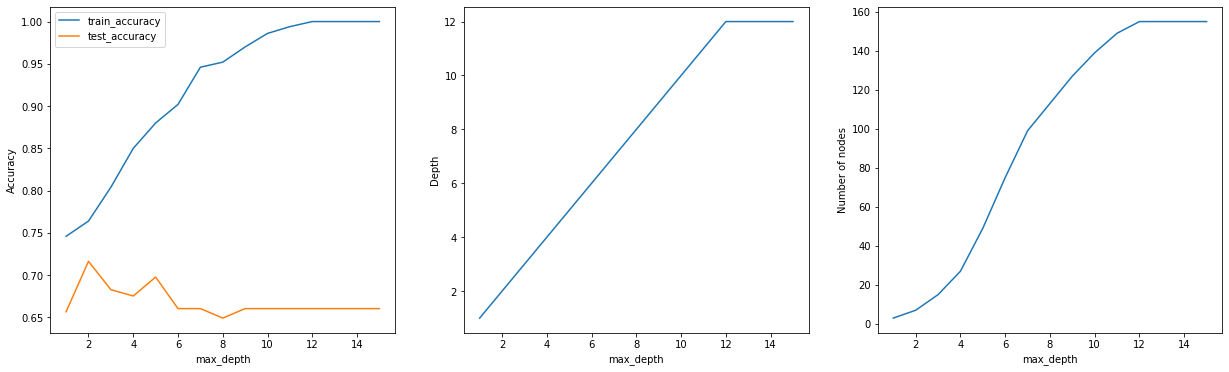

In [13]:
plot_graph(X_train, X_test, y_train, y_test, min_splits = 2)

### P1.3

In [14]:
my_clf.traverse()

node=0 is a split node: go to left node 1 if self.X[:, 1] <= 0.6156 else to right node 12: Impurity 0.4526, Improvement 0.1014, Precdtion => 0
       node=1 is a split node: go to left node 2 if self.X[:, 0] <= 0.3824 else to right node 7: Impurity 0.2589, Improvement 0.0285, Precdtion => 0
       node=12 is a split node: go to left node 13 if self.X[:, 1] <= 0.7764 else to right node 20: Impurity 0.4765, Improvement 0.0619, Precdtion => 1
               node=2 is a split node: go to left node 3 if self.X[:, 5] <= 0.6788 else to right node 6: Impurity 0.1877, Improvement 0.0196, Precdtion => 0
               node=7 is a split node: go to left node 8 if self.X[:, 1] <= 0.4447 else to right node 9: Impurity 0.4950, Improvement 0.1176, Precdtion => 0
               node=13 is a split node: go to left node 14 if self.X[:, 5] <= 0.4463 else to right node 17: Impurity 0.4975, Improvement 0.0446, Precdtion => 0
               node=20 is a split node: go to left node 21 if self.X[:, 6] <= 0.10


## Analysis and discussion (20 points)

Your answer must include.....

- Explanation of your implementation of a decision tree method,
- Comparison of two crieteria (the Gini index vs. the classification error),
- Analysis of the results from P1. 
    
For analysis and discussion, you can exploit all functions you've written or make your own functions (or scripts).



*   Gini index와 classification error의 차이
 - 두 crieteria 모두 split을 할 때 greedy한 방법으로 진행된다. 어떤 기준(feature와 threshold)를 통해 split을 하는 시점에서 classification error/weighted gini impurity를 가장 작게하면 된다.
 - classification error는 root node로 부터 decision stump를 통해 뻗어나간 마지막 노드에서 계산된다. 각 노드의 data가 가리키는 target(label, y값, 정답값, Majority class) 중 가장 많은 target이 그 노드의 prediction이 된다. 이때, 각 노드에서 정해진 정답이 아닌 data의 수를 다 더하여 모든 data의 수로 나누는 것이 calssfcation error이며 이를 minimize하는 것이 목적이다.    
 - Gini index는 노드의 순도(impurity)를 의미한다. 그 impurity는 최소 0에서 최대 0.5의 값을 갖는다. 이때 0은 그 노드에 있는 data가 가리키는 target이 모두 동일하다는 것을 의미하고, 0.5는 그노드의 data가 가리키는 각 target의 수가 정확히 동일함을 의미한다. 




*   leaf_node

 => leaf_node를 반환한다. leaf node는 split을 중지하는 노드이며 split이 중지되는 조건은 아래 build와 best split에서 구현하였다. leaf_node의 dictionary key는 ['impurity','prediction','is_leaf', 'node_number', 'depth', 'idx','parent']이며, argument로 받아지는 index를 통해 impurity와 prediction을 계산하여 value로 넣는다

*   node_prediction

 => index를 argument로 받아 그 index에 대한 majority class를 반환한다.

*   compute_gini_impurity
 
 => arguments로 index 두 개를 받는다. 만약 한 쪽의 index가 비어있는 경우 index가 가리키는 target을 기준으로 그룹을 나누고 gini impurity를 계산한다. 두 index가 모두 비어 있지 않은 경우, 두 index각각의 gini impurity를 구하고, 두 인덱스 수에 따라 weight를 부여하여 weighted gini impurity를 계산한다.

*   best split
 
 => best split에서는 split node 또는 leaf node를 반환한다. 
 몇 가지 stop condition이 만족하면 leaf node, 그렇지 않다면 split node를 반환한다. 

 => stop condition은 다음과 같다. 
  1. argument로 들어오는 index의 개수가 min_splits보다 작다면 split하는 것이 무의미하다고 판단하여 leaf node를 반환한다.
  2. imporvement를 위해 greedy feature와 threshole를 구한 후 계산한 improvement가 0이하이면 leaf node를 반환한다.
  3. imporvement를 계산하는 과정에서 target을 기준으로 나누어진 index가 하나의 target만을 가리키고 있다면 leaf node를 반환한다.


*   build

 => stack을 이용하여 tree를 형성한다. 새로운 node가 형성될 때 마다 node_number를 1씩 올려주고 그 node에 있는 'node_number'의 key에 그 값을 넣어준다. 이 node_number는 그 node에 대한 identifier 역할을 할 수 있다. 또한 각 노드의 dictionary의 key중 'depth'에 값을 넣어준다. 이 depth를 통해 max_depth에 도달하였을 때 early stop을 하는 조건을 만족시킬 수 있다. 이 max_depth에 도달하면 그 노드를 leaf node로 바꿔준다.   

*   prediction

 => build를 통해 만들어진 tree를 통해 input으로 받은 data를 분류한다. data를 하나씩 받아서 tree를 통해 분류 하여 target값을 내놓고 받은 데이터의 Index개수 만큼 반복한다. 이때 예측값은 input이 어떤 target을 나타내는 지를 list로 반환한다.

*   traverse

 => 빈 list를 만들어 그 list에 root node를 불러와 저장하고 그 node에 대한 자식 노드들을 list에 계속 추가하여 for문을 돌린다.





*   P1.1

 => classifier를 구성한 후 X값을 classification 한다 이때, y_pred에는 X의 행 수 만큼의 예측값이 들어 있다 이를 정답데이터와 비교한다. 이때, arrcuracy는 일치하는 개수/전체 개수로 구해진다.
*   P1.2
 
 => max_depth가 증가함에 따라 overfitting이 되어 train_accuracy가 증가하는 것을 확인할 수 있다. 이때, 특정 max_depth값 이상이 되면 node의 개수와 depth가 동일한 값으로 유지되며 train_accuracy가 1이 되는 것을 확인할 수 있다.

 => test_accuracy는 max_depth마다 그 값이 달라지는 것을 확인할 수 있다. decision tree는 hard NP문제이기 때문에 어떤 tree가 best인지 확인할 수 없고 여러 시도를 해서  그중 가장 좋은 모델을 선택해서 사용해야한다. 
*   P1.3

 => Breadth First Search 방식으로 모든 노드에 대한 정보를 출력하였다.

